In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [5]:
# load the data
validation_folder = 'validations'
# validation_file = 'gyro_fiverun_mean_validation_simple.pkl'
validation_file  = 'accel_fiverun_mean_validation_simple_herding.pkl'
validation_path = os.path.join(validation_folder, validation_file)
all_files = [
    'gyro_fiverun_mean_validation_simple.pkl',
    'accel_fiverun_mean_validation_simple.pkl',
    'gyro_fiverun_mean_validation_simple_herding.pkl',
    'accel_fiverun_mean_validation_simple_herding.pkl'
]
# 

In [14]:
def run_file(data, file):
    fig, axes = plt.subplots(len(data.keys()), 2, figsize=(10, 5 * len(data.keys())))
    # set the title to be Loss and Accuracy for the whole plot
    fig.suptitle('Loss and Accuracy for each task and overall')
    
    valid_acc = []
    for task in data.keys():
        # go through epoch
        # print(data[task][0]['overall'])
    
         # get the validation loss for each task
        valid_loss = []
        task_valid_acc = []
        for validation_task in range(len(data[task][0]['individual'])):
            print(validation_task)
                # this is getting all the values for one first which makes sense
            print([data[task] for i in data[task].keys()])
            all_valid_task_loss = [data[task][i]['individual'][validation_task]['task_validation_loss'] for i in
                                       data[task].keys()]
            all_valid_task_acc = [data[task][i]['individual'][validation_task]['task_accuracy'] for i in
                                      data[task].keys()]
                # overall accuracy
            total_valid_task_loss = [data[task][i]['overall']['total_validation_accuracy'] for i in data[task].keys()]
                # overall loss
            total_valid_task_acc = [data[task][i]['overall']['total_loss'] for i in data[task].keys()]
            axes[task, 0].plot(range(len(data[task].keys())), all_valid_task_acc,
                                   label=f"Accuracy for t:{validation_task} in t:{task}")
            # axes[task, 0].plot(range(len(data[task].keys())), total_valid_task_loss,
            #                        label=f"Overall Accuracy task {validation_task} in t:{task}")
            axes[task, 0].plot()
            axes[task, 0].legend()
    
            axes[task, 1].plot(range(len(data[task].keys())), all_valid_task_loss,
                                   label=f"Loss t:{validation_task} in t:{task}")
            # axes[task, 1].plot(range(len(data[task].keys())), total_valid_task_acc,
            #                        label=f"Overall Loss t:{validation_task} in t:{task}")
            axes[task, 1].legend()
                # move the legend so it does not obscure the plot to the top
                # axes[task,0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
                #   ncol=3, fancybox=True, shadow=True)
    
                # add gridlines to both
            axes[task, 0].grid()
            axes[task, 1].grid()
                # add x label of epoch
            axes[task, 0].set_xlabel('Epoch')
            axes[task, 1].set_xlabel('Epoch')
                # add y label of accuracy for the first one
            axes[task, 0].set_ylabel('Accuracy')
            axes[task, 1].set_ylabel('Loss')
    
            task_valid_acc.append(all_valid_task_loss)
    
        valid_acc.append(task_valid_acc)
    
        # print(valid_acc)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(f"plots/{file.replace('.pkl','')}.png")
    
    plt.show()
        # save the plot as an image to the folder plots and have the name be in the format plot_<FileName>.png
        # plt.savefig(f"plots/plot_{validation_file.split('.')[0]}.png")

In [15]:
def run_all(files):
    for file in files:
        dat = None
        with open(os.path.join(validation_folder, file), 'rb') as f:
            dat = pickle.load(f)
        run_file(dat, file)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



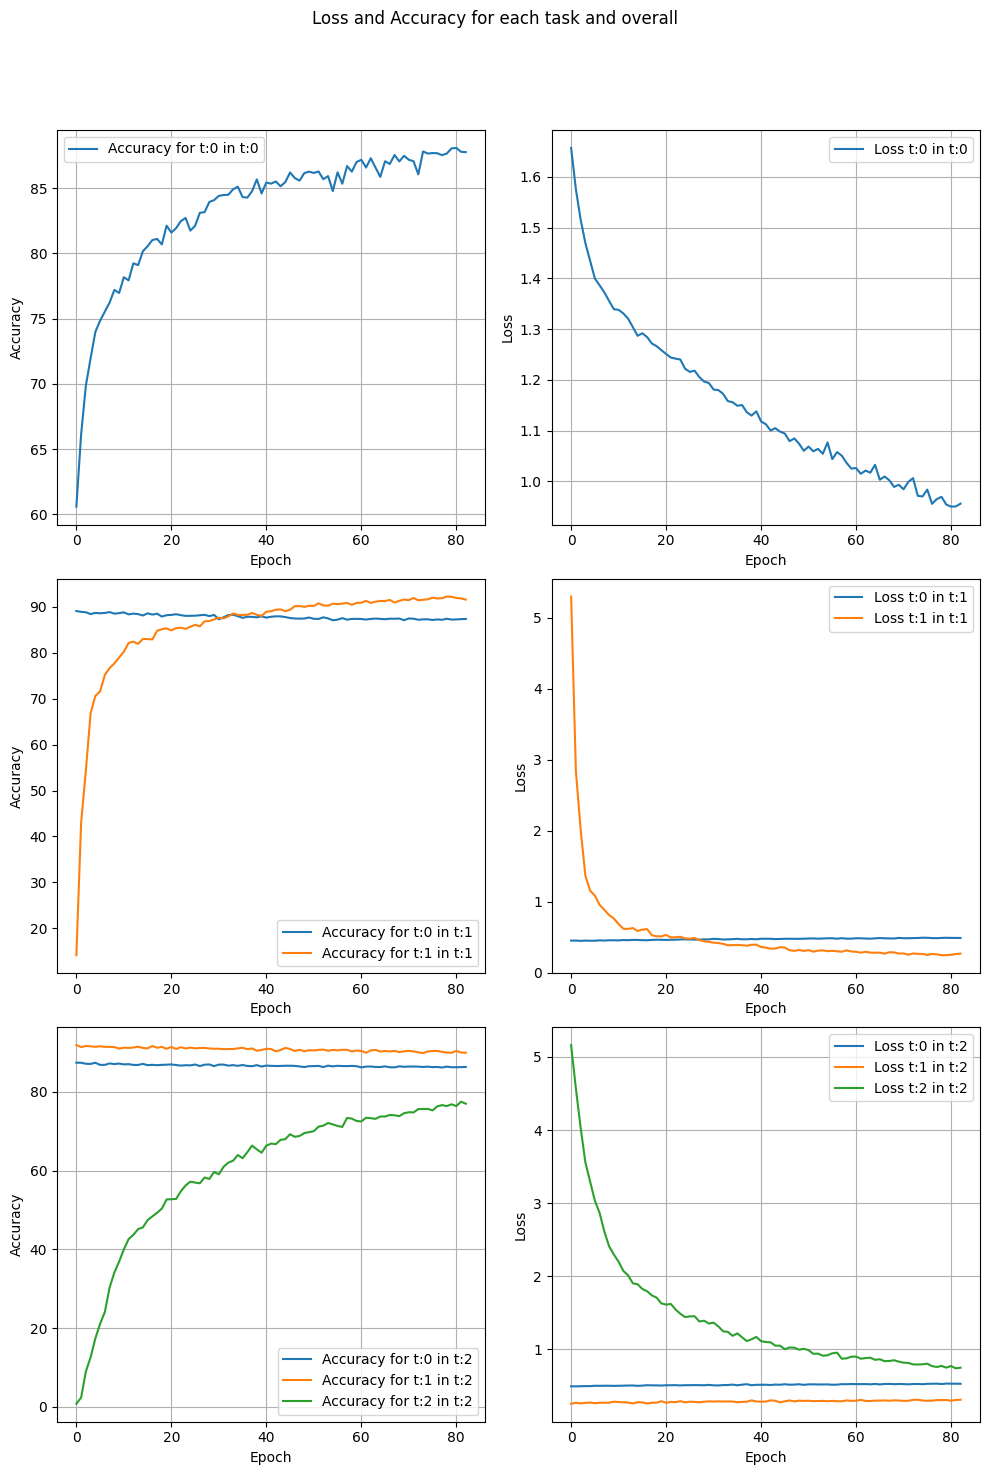

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



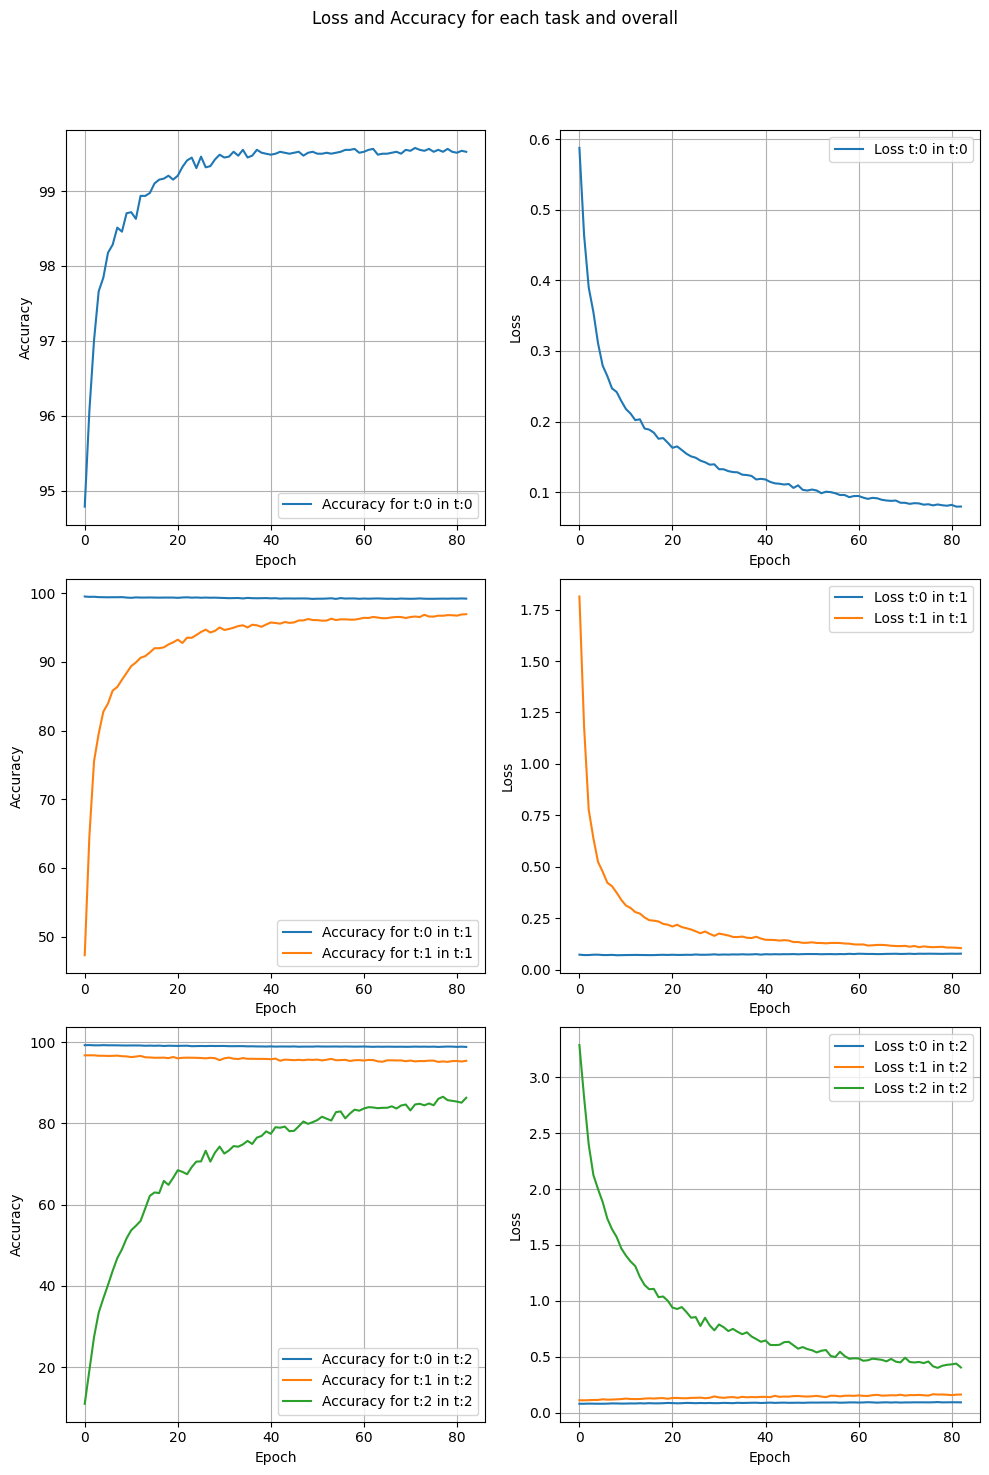

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



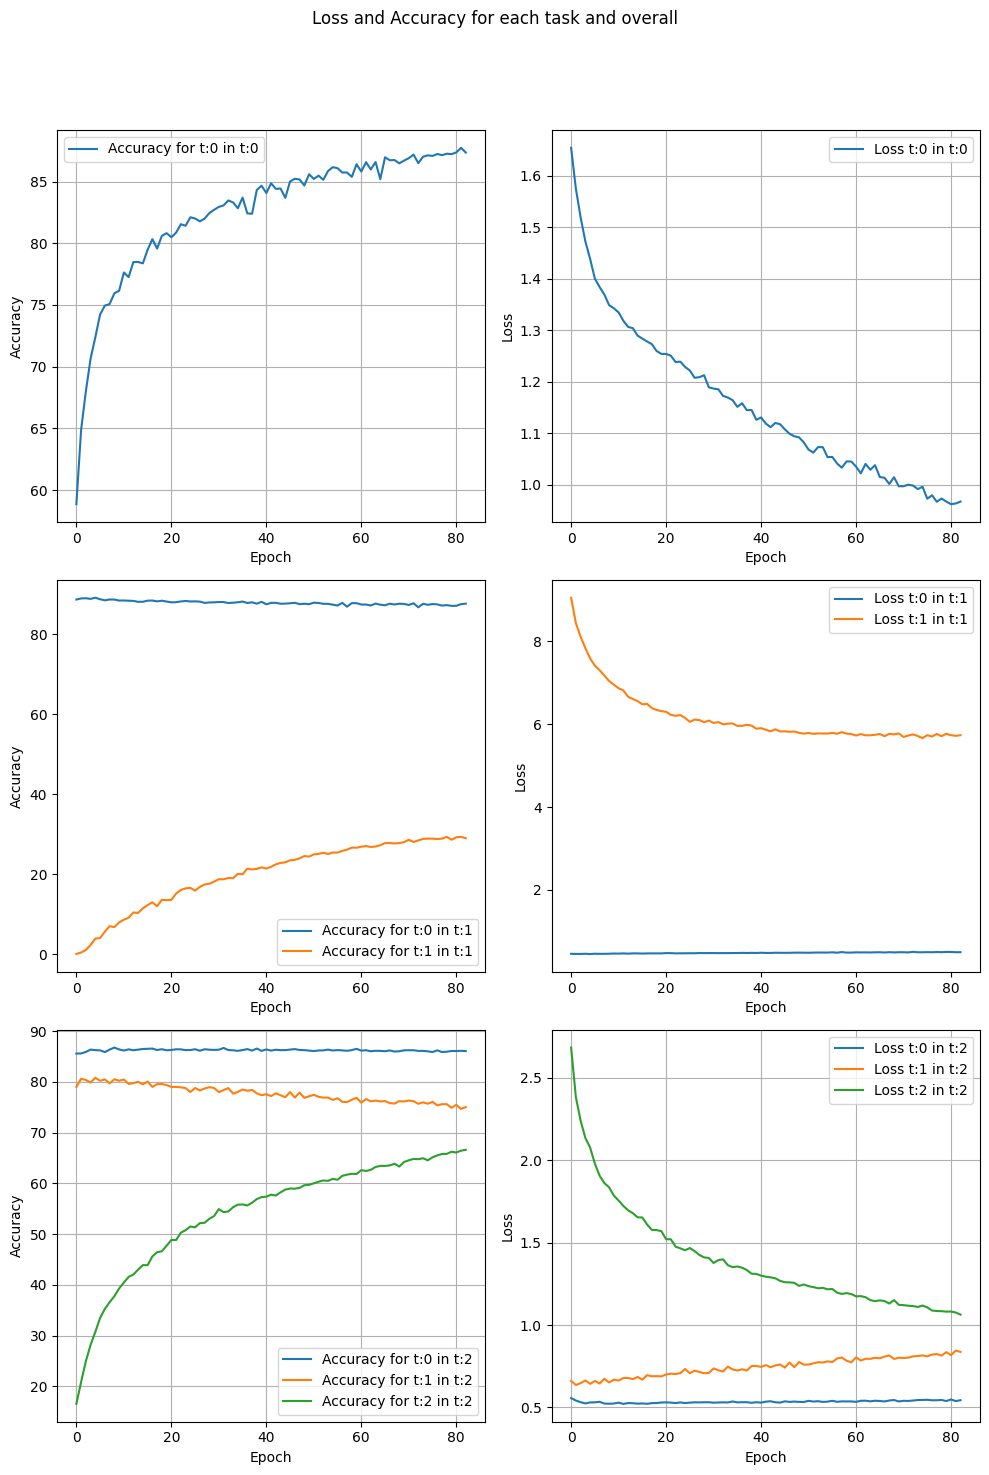

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



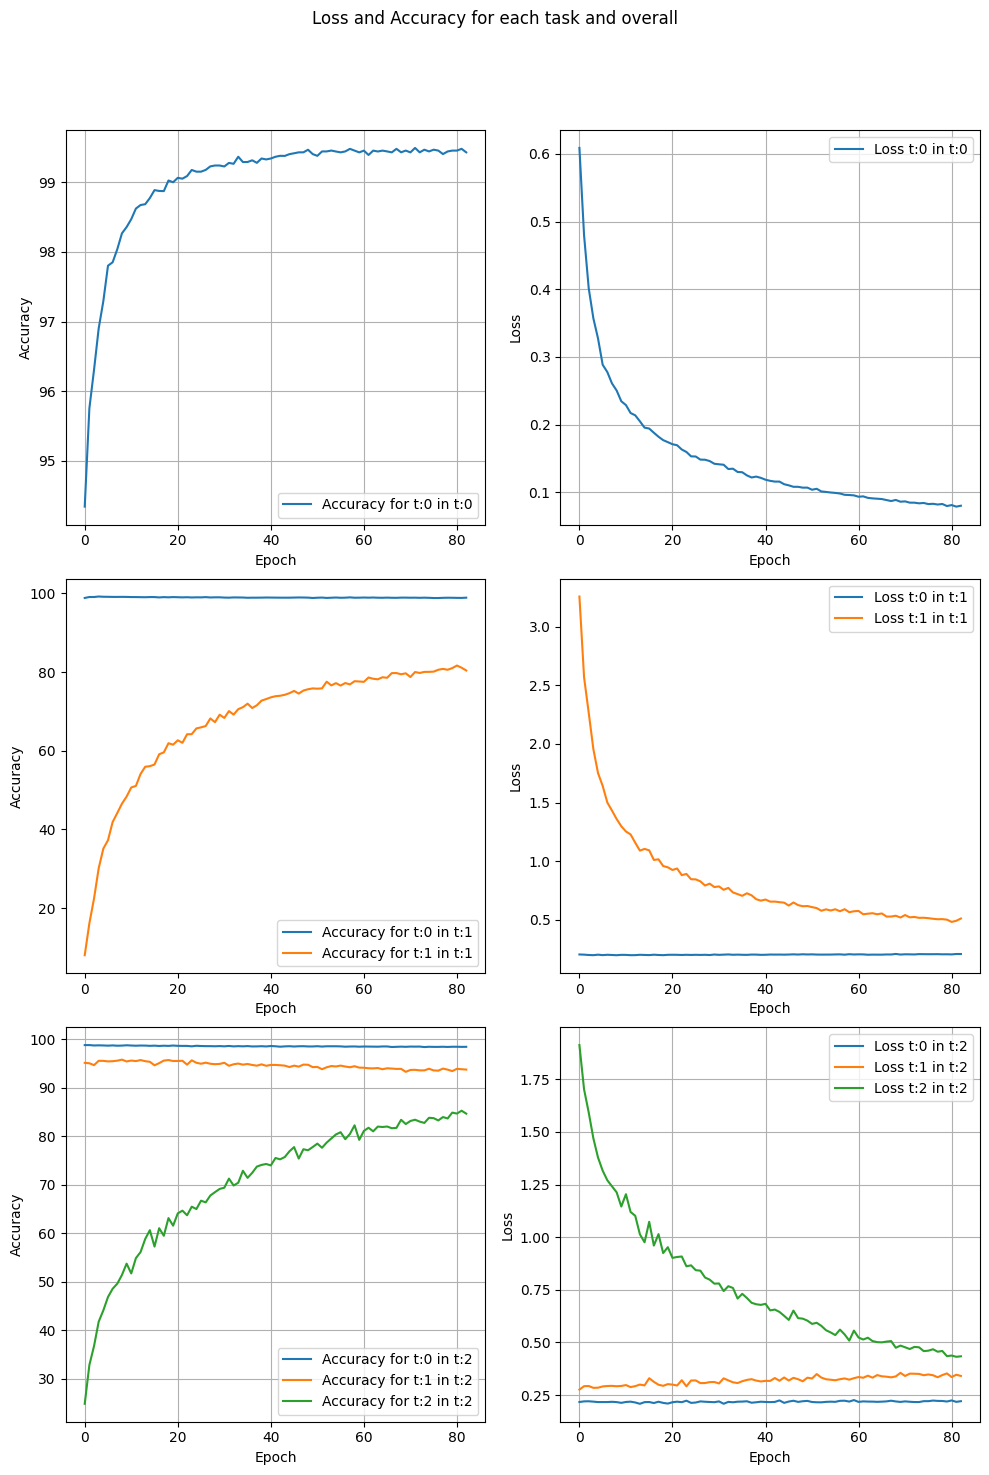

In [16]:
run_all(all_files)